In [1]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

In [2]:
df_test = pd.read_excel('data/data_w_origin/GHOMOYAT.xlsx')
#df_test.head()

In [4]:
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df_test['Sen']=df_test['Sen'].apply(lambda cw : remove_tags(cw))
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,1380/01/19,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,1380/08/03,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,1380/01/01,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,1379/08/05,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,1381/05/06,0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [5]:
test = '1380/01/19'
day, month, year = test.split("/")
year

'19'

In [6]:
def age_calc(string):
    year, month, day = string.split("/")
    year = 1401 - int(year)
    return year

df_test['Sen']=df_test['Sen'].apply(lambda cw : age_calc(cw))
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,21,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,22,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,20,0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [7]:
cols = ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP']
df_test.columns = cols
df_test.columns
df_test = df_test.loc[~(df_test == 999).any(axis=1)]

1    8776
2    1287
5    1212
3    1175
4     940
Name: Mantagheh, dtype: int64


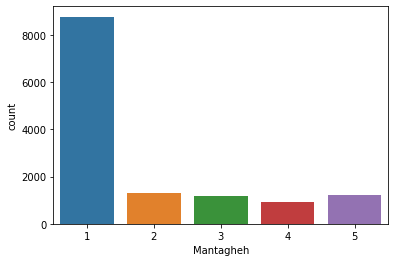

In [8]:
sns.countplot(x='Mantagheh', data=df_test)
print(df_test['Mantagheh'].value_counts())

1    8465
2    1972
6     831
4     809
3     780
5     533
Name: GDP, dtype: int64


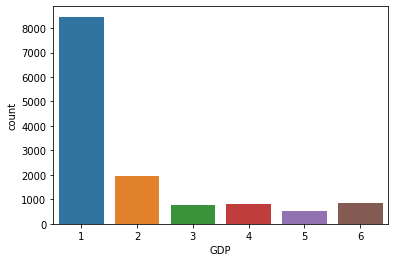

In [9]:
sns.countplot(x='GDP', data=df_test)
print(df_test['GDP'].value_counts())

In [10]:
# create a dictionary to map unique values to numbers
mapping_dict = {}
variables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})
for col in variables:
    unique_values = df_test[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df_test.replace(mapping_dict, inplace=True)
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,0,21,0,0,14.00,0,0,0,6,0,0,0,0,0,0,0,0,0,0
1,0,21,0,0,14.00,0,0,0,6,0,0,0,0,0,0,0,0,1,1
2,0,21,0,0,12.61,0,0,0,6,0,1,0,0,0,0,0,0,2,2
3,0,22,0,0,13.93,0,0,0,6,0,0,0,0,0,0,0,0,2,2
5,0,21,0,0,18.90,0,0,0,6,0,1,0,0,0,0,0,0,2,2


<Axes: >

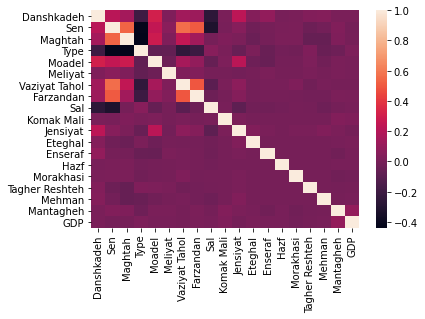

In [11]:
sns.heatmap(df_test.corr(), annot=False)

In [12]:
df_test.dropna(inplace=True)
df_test.isna().sum()

Danshkadeh        0
Sen               0
Maghtah           0
Type              0
Moadel            0
Meliyat           0
Vaziyat Tahol     0
Farzandan         0
Sal               0
Komak Mali        0
Jensiyat          0
Eteghal           0
Enseraf           0
Hazf              0
Morakhasi         0
Tagher Reshteh    0
Mehman            0
Mantagheh         0
GDP               0
dtype: int64

In [13]:
df_test.columns

Index(['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP'],
      dtype='object')

In [14]:
X = df_test.drop(['Mantagheh'], axis=1) 
y = df_test['Mantagheh']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'GDP']
(10712, 18)
(2678, 18)
(10712,)
(2678,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'none', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy Score: 0.6665421956684092
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       220
           1       0.00      0.00      0.00       266
           2       0.67      1.00      0.80      1773
           3       0.50      0.00      0.01       234
           4       0.56      0.10      0.17       185

    accuracy                           0.67      2678
   macro avg       0.35      0.22

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [15]:
from sklearn.tree import DecisionTreeClassifier

X = df_test.drop(['Mantagheh'], axis=1) 
y = df_test['Mantagheh']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'GDP']
(10712, 18)
(2678, 18)
(10712,)
(2678,)
              precision    recall  f1-score   support

           0       0.41      0.42      0.42       220
           1       0.20      0.19      0.19       266
           2       0.78      0.76      0.77      1773
           3       0.14      0.17      0.15       234
           4       0.27      0.30      0.28       185

    accuracy                           0.59      2678
   macro avg       0.36      0.37      0.36      2678
weighted avg       0.60      0.59      0.60      2678

[[  93   22   40   24   41]
 [  16   50  136   32   32]
 [  58  140 1346  169   60]
 [  16   20  146   39   13]
 [  44   20   58    8   55]]
